**토큰화된 데이터 분석하기**

In [1]:
import pandas as pd

train_df = pd.read_excel('./middle/after_tokenized_train.xlsx')
test_df = pd.read_excel('./middle/after_tokenized_test.xlsx')
all_df = pd.concat([train_df, test_df], ignore_index=True)

In [3]:
train_df.head()['tokenized_text']

0                          ['유소영', '비호감', '성형', '아줌마']
1                                       ['나오지마라', '썅']
2    ['식상하고', '지긋지긋했는데', '잘', '끝나네', '오예', '소리', '벗...
3                     ['성희롱', '당할', '얼굴', '아닌데', 'ㅋㅋ']
4    ['끝', '까지', '해보자', '쪽바리', '원숭이', '자유', '한국', '...
Name: tokenized_text, dtype: object

In [51]:
def get_list_length(tokens):
    return len(eval(tokens))

# 문자열 길이별 그래프 그리기
all_df['tokenized_length'] = all_df['tokenized_text'].apply(get_list_length)

In [56]:
# train_df 에서 label 별 문장길이 분석
train_df = all_df[:len(train_df)]
test_df = all_df[len(train_df):]

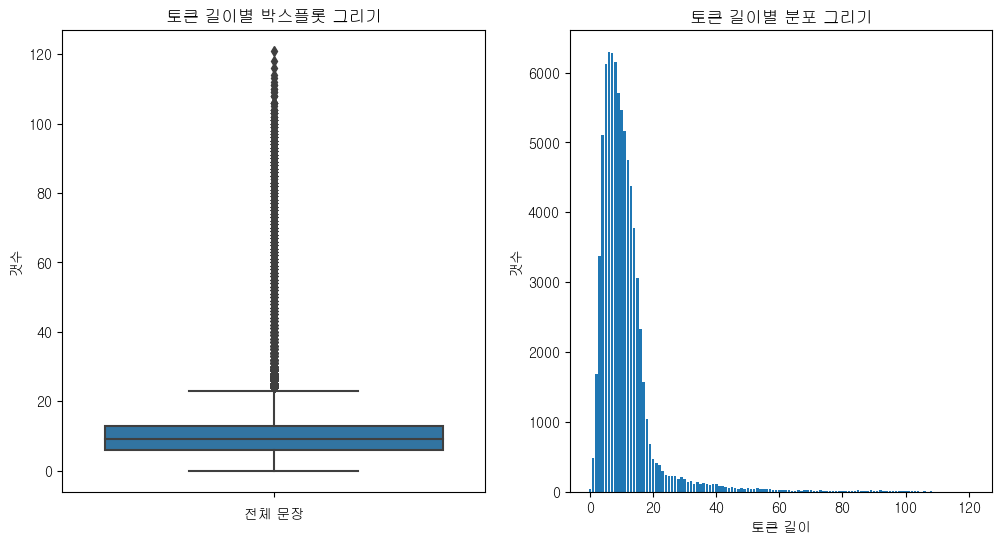

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# sns  한국어패치
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# tokenized_length 컬럼에서 각 길이별 데이터 개수를 구함
length_count = all_df['tokenized_length'].value_counts()

# 그래프를 그리기 위해 길이별 데이터 개수를 리스트로 변환

length_list = list(length_count.index)
count_list = list(length_count.values)

# 박스플롯 그리기
sns.boxplot(y='tokenized_length', data=all_df, ax=axs[0])
axs[0].set_title('토큰 길이별 박스플롯 그리기')
axs[0].set_xlabel('전체 문장')
axs[0].set_ylabel('갯수')

# 막대그래프 그리기
axs[1].bar(length_list, count_list)
# 그래프 타이틀, x축 라벨, y축 라벨 설정
axs[1].set_title('토큰 길이별 분포 그리기')
axs[1].set_xlabel('토큰 길이')
axs[1].set_ylabel('갯수')

# 그래프 출력
plt.show()

**먼가 이상데이터 60이상인 애들 은 제거해도(?) 될거같다**

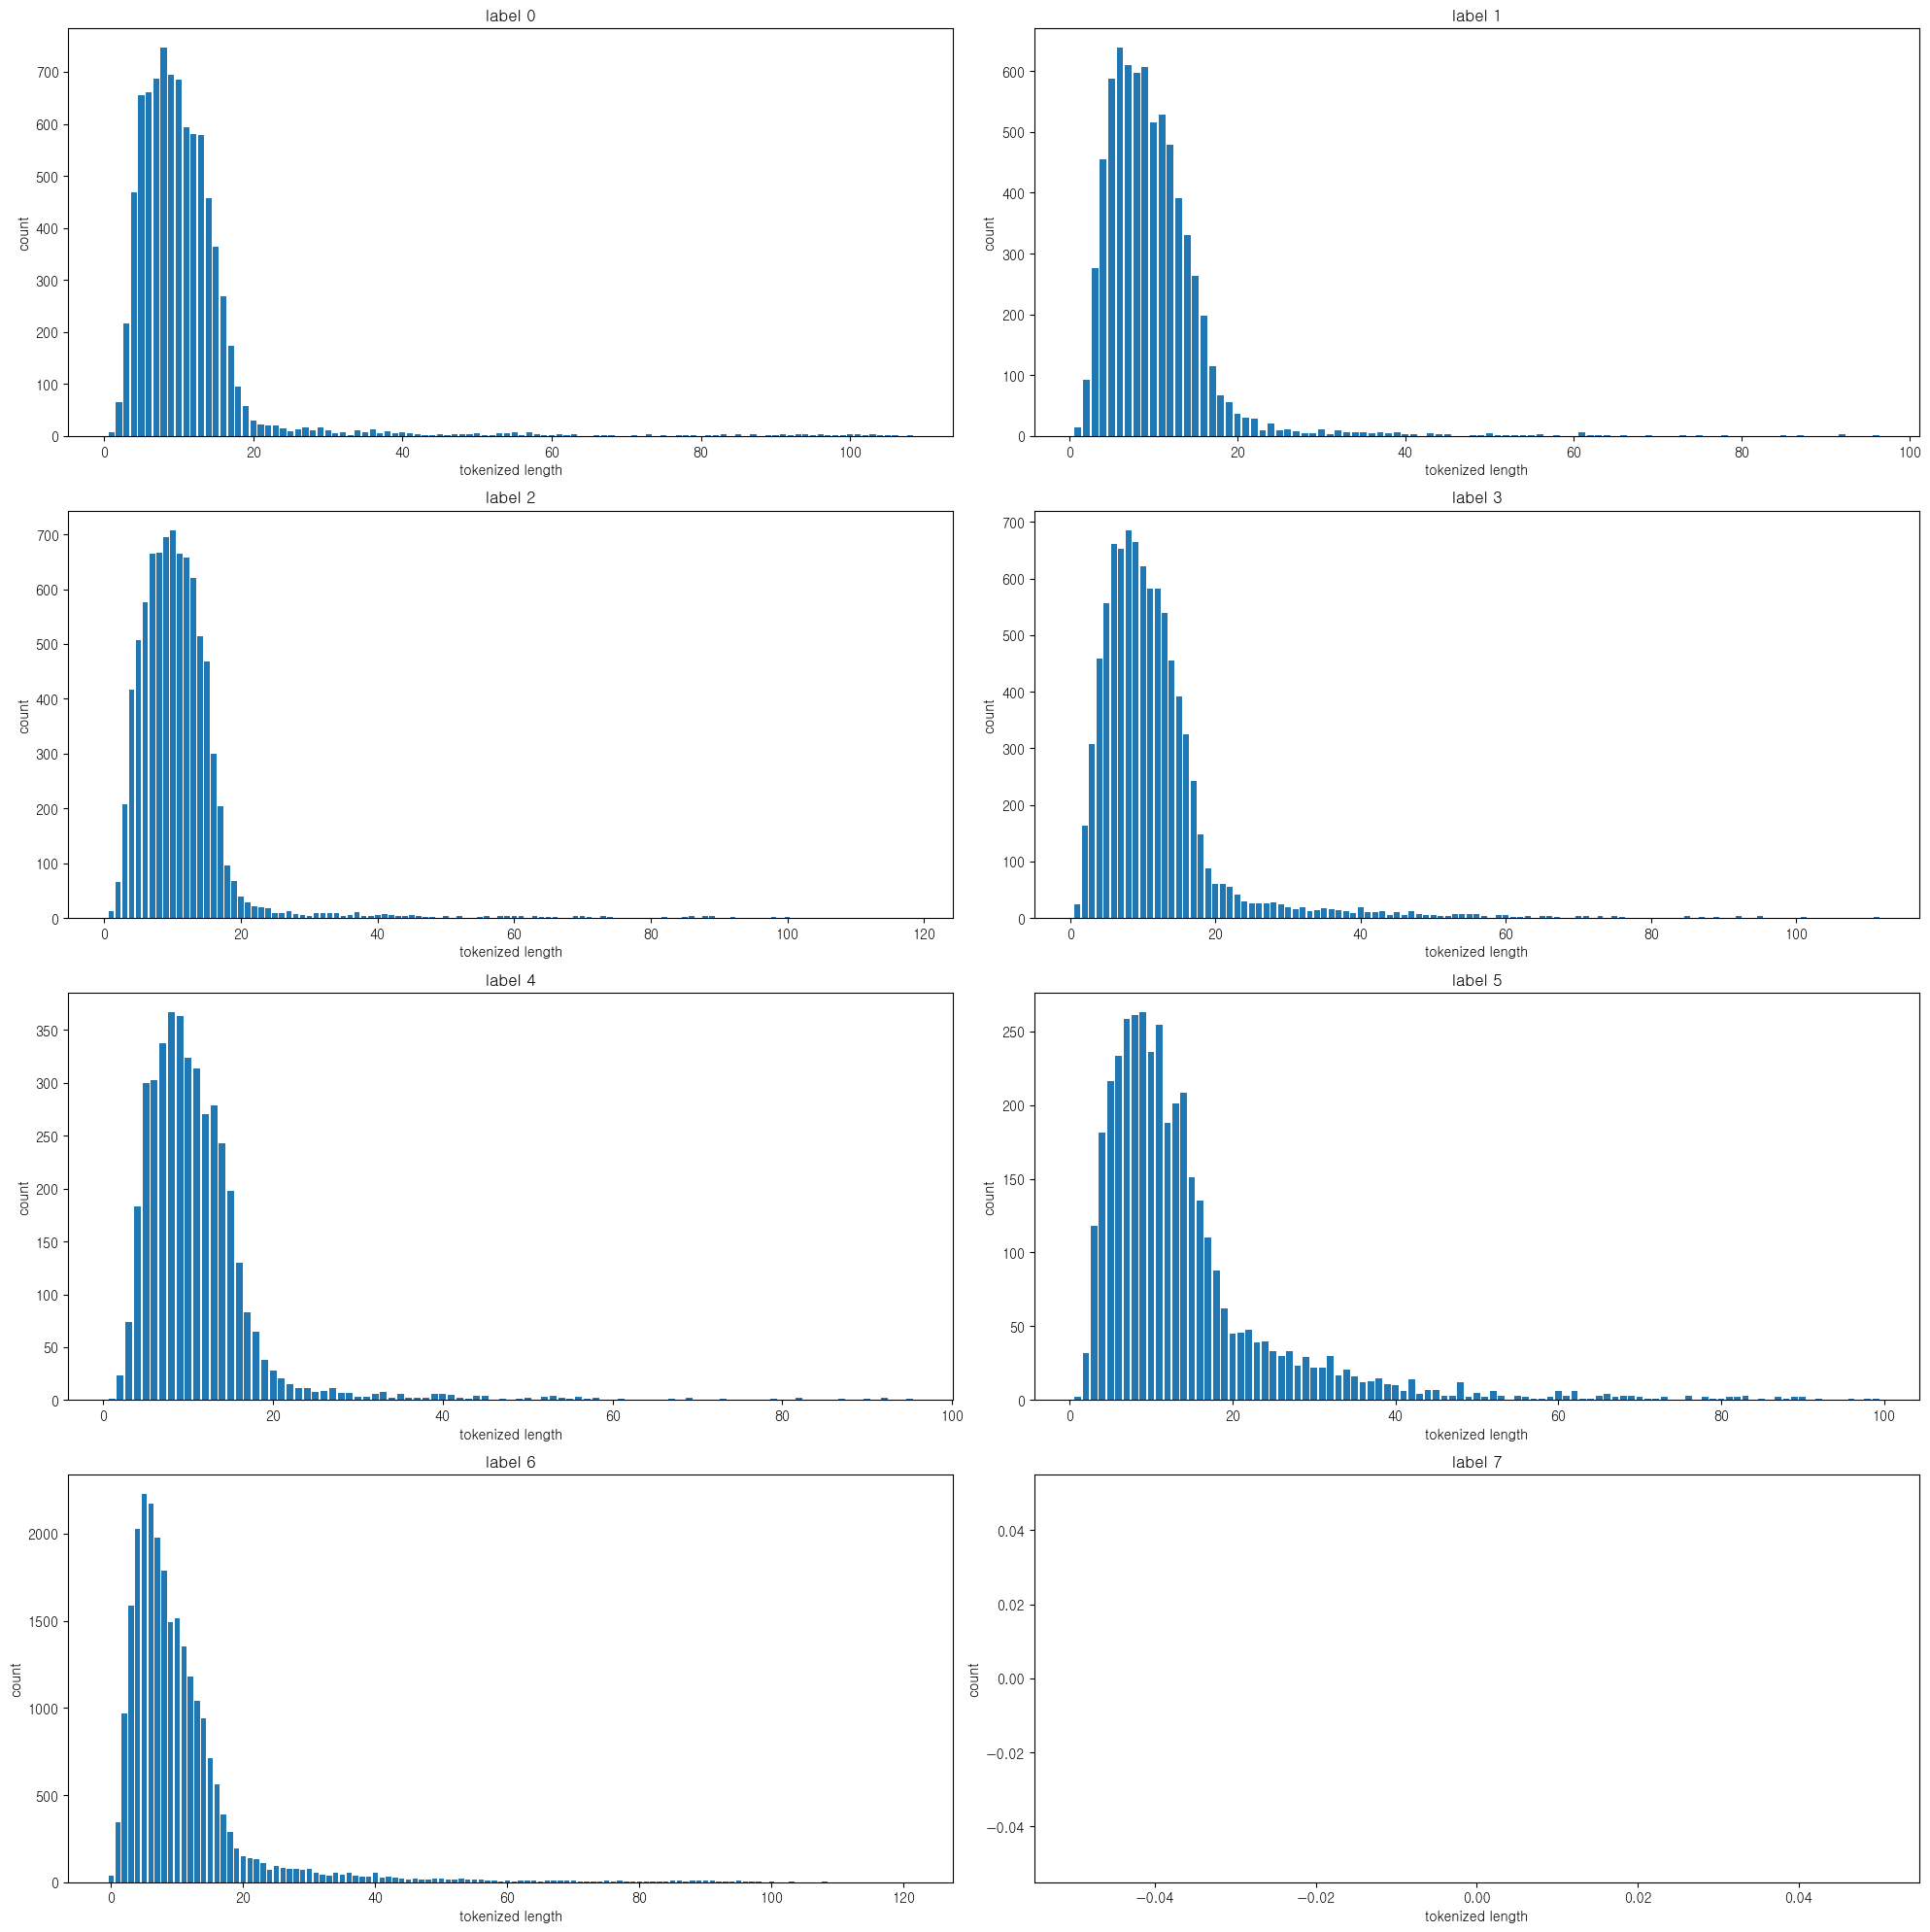

In [46]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
print(axs.flat)
for i, ax in enumerate(axs.flat):
    label_df = all_df[all_df['label']==i]
    lengths = label_df['tokenized_length']
    ax.bar(lengths.value_counts().index, lengths.value_counts().values)
    ax.set_title(f'label {i}')
    ax.set_xlabel('tokenized length')
    ax.set_ylabel('count')
    
plt.tight_layout()
plt.show()

**Train_df 에서 길이 40이상인 것들 제거하고 다시 그려보자**
**라벨별로 길이차이는 딱히 없는듯 댓글특성상 그런듯..**

In [57]:
print(f'변경전 길이 : {len(train_df)}')
train_df = train_df[train_df['tokenized_length'] <= 40]
print(f'변경후 길이 : {len(train_df)}')

변경전 길이 : 65863
변경후 길이 : 64561


,text,label,processed_text,tokenized_text,tokenized_length
0,유소영비호감 성형아줌마,1.0,유소영비호감 성형아줌마,"['유소영', '비호감', '성형', '아줌마']",4
1,나오지마라 썅,3.0,나오지마라 썅,"['나오지마라', '썅']",2
2,식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러~~!!!,6.0,식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러,"['식상하고', '지긋지긋했는데', '잘', '끝나네', '오예', '소리', '벗...",9
3,성희롱 당할 얼굴이 아닌데?ㅋㅋㅋ,5.0,성희롱 당할 얼굴이 아닌데ㅋㅋ,"['성희롱', '당할', '얼굴', '아닌데', 'ㅋㅋ']",5
4,"""끝까지 해보자~쪽파리 원숭이 자한 쓰레기당""",0.0,끝까지 해보자쪽바리 원숭이 자유한국당 쓰레기,"['끝', '까지', '해보자', '쪽바리', '원숭이', '자유', '한국', '...",9


**train_df 에서 각 라벨별 많이나오는 토큰 WordCloud로 분석하기**

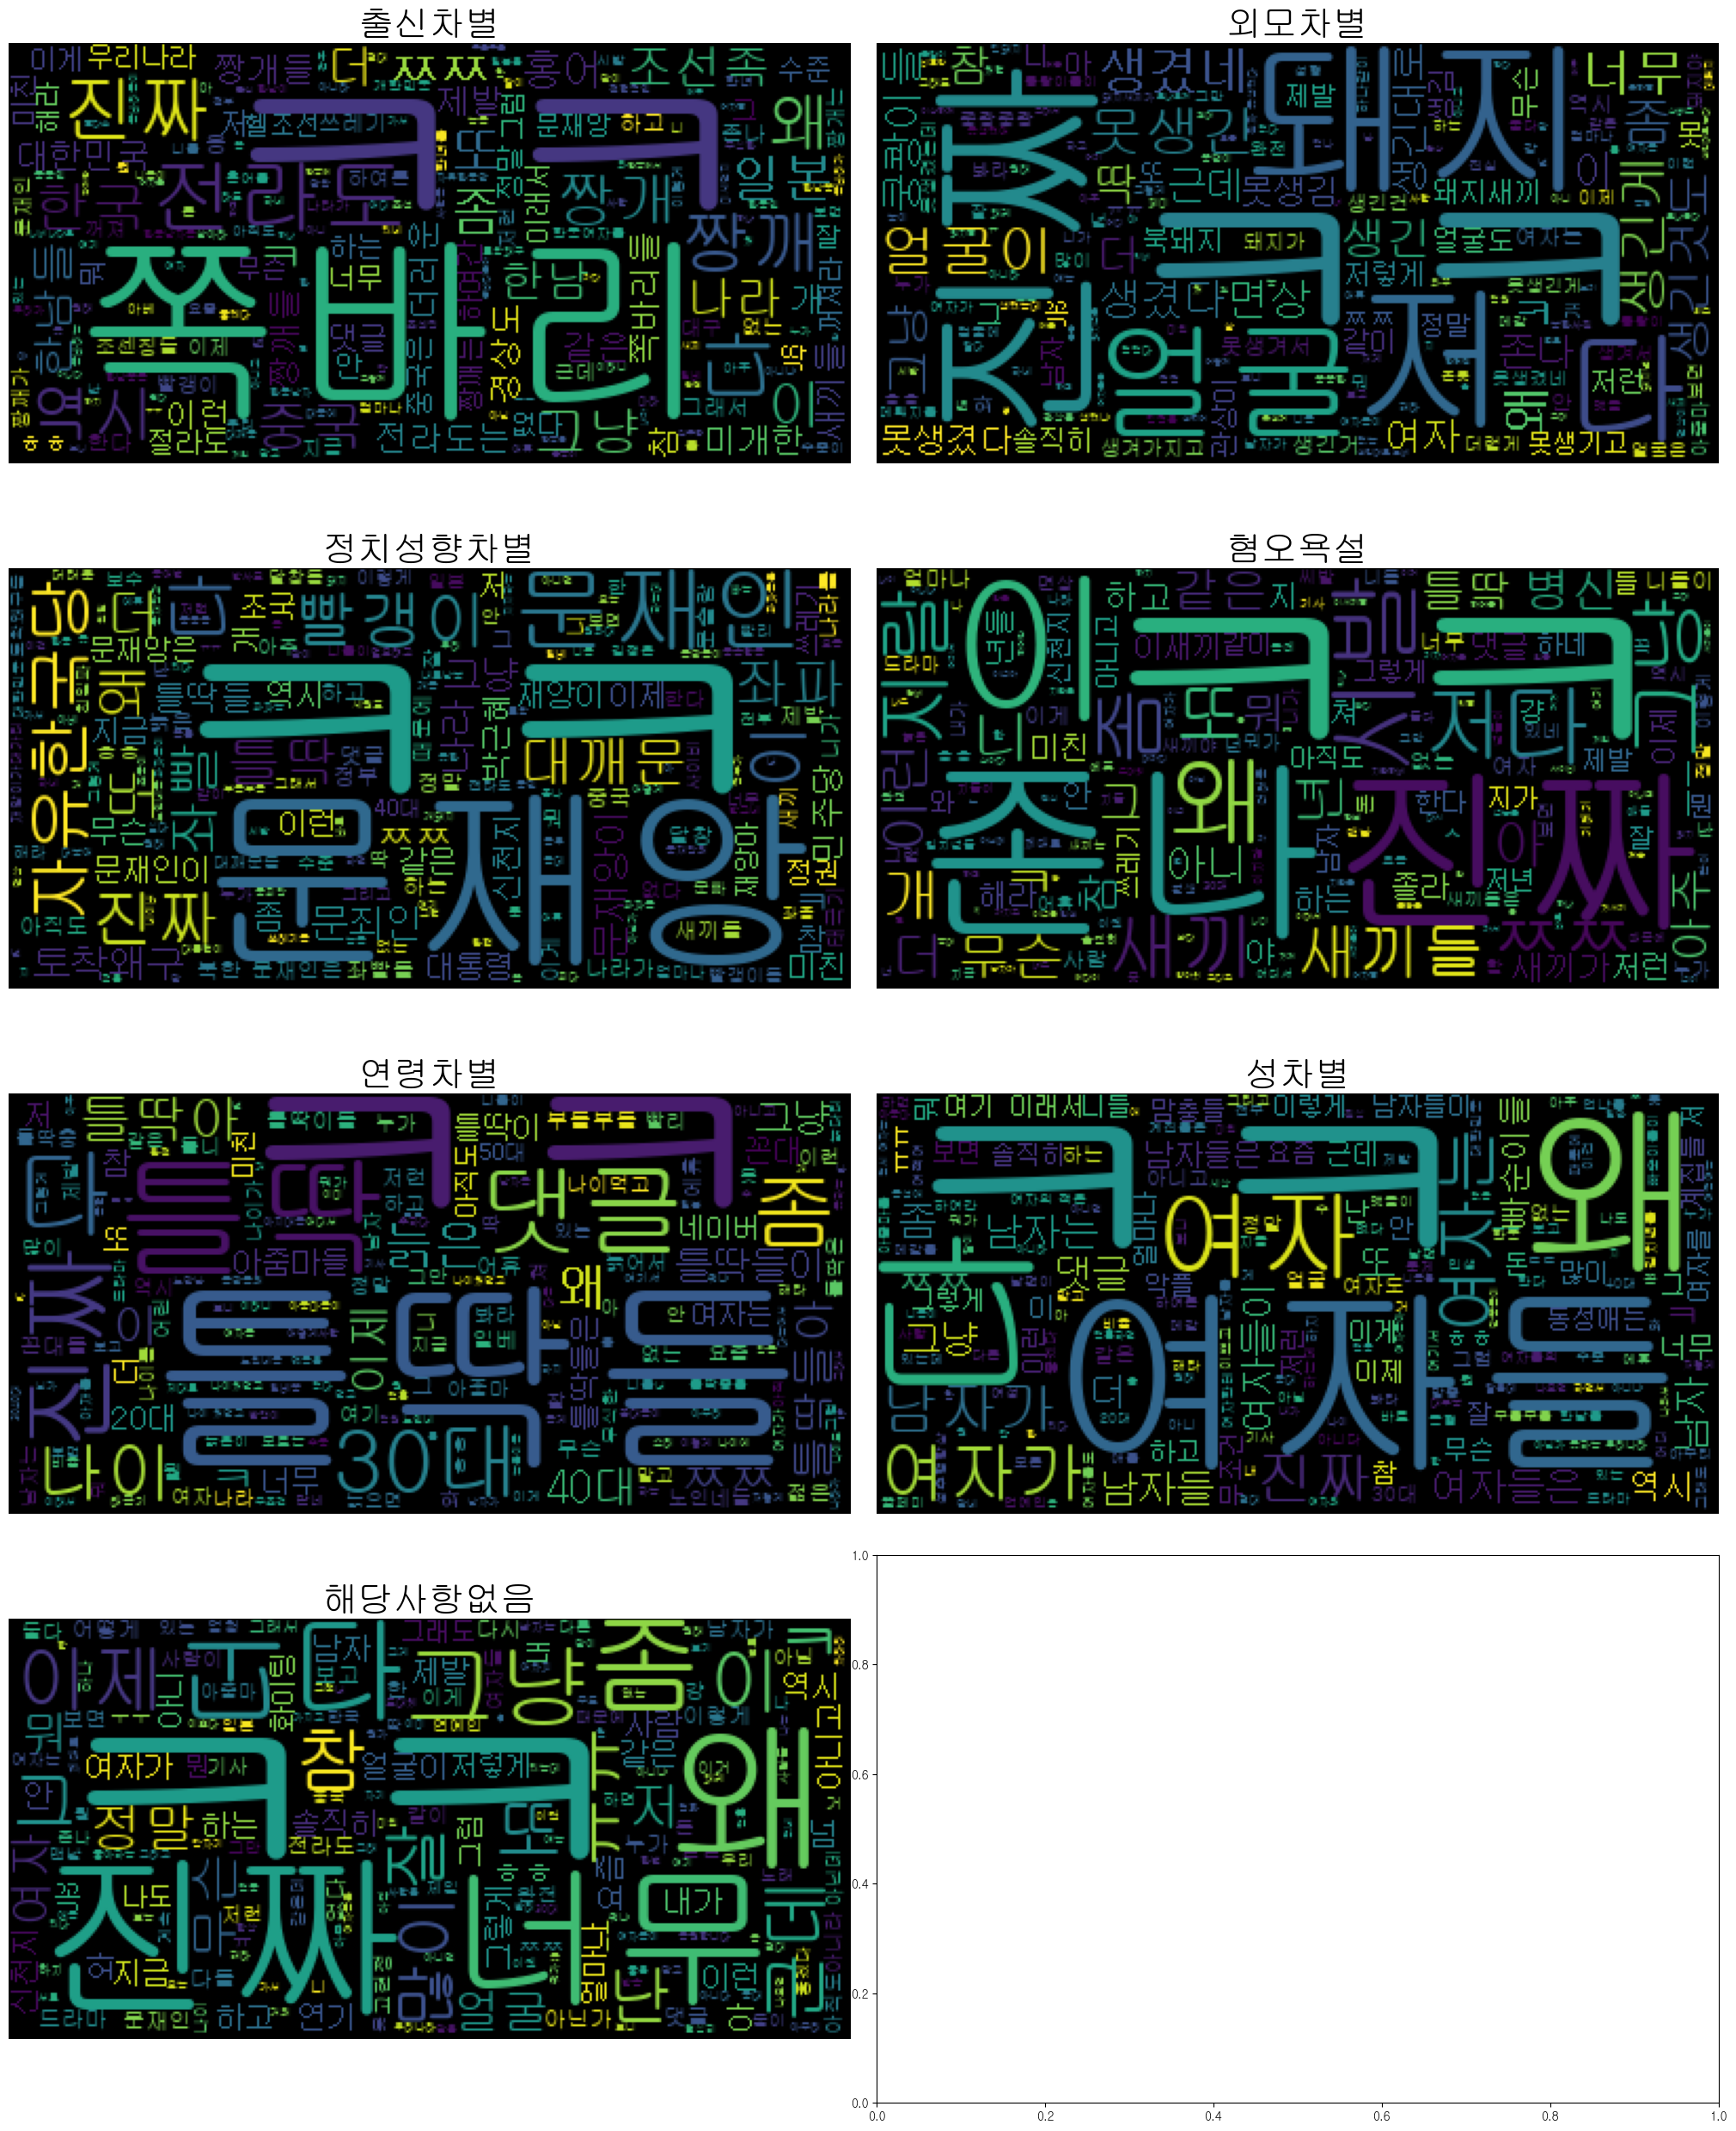

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(20, 25))
title_dict = {
    0 : "출신차별", 1 : "외모차별", 2 : "정치성향차별", 
    3 : "혐오욕설", 4 : "연령차별", 5 : "성차별",
    6 : "해당사항없음"
}

# 각 라벨에 해당하는 데이터 추출
for idx in range(7):
    row = idx//2
    col = idx % 2
     
    text = " ".join(train_df.loc[train_df['label'] == idx, 'processed_text'].fillna('').tolist())
    wordcloud = WordCloud(font_path=font_path,background_color='black').generate(text)
    
    axs[row, col].imshow(wordcloud)
    axs[row, col].set_title(title_dict[idx],fontdict={'fontsize': 30})
    axs[row, col].axis('off')
    
plt.tight_layout(pad=0)
plt.show()

**(ㅋㅋ,진짜,왜,들)  공통적이기에 삭제해도 될듯**
**토크나이징 기법에 조금 문제가 있는것 같다 너무 특수한 것까지 토큰화한것이 요번 대회 패착같음**